Dataset Description:

1. Transaction_ID: Unique identifier for each transaction.

2. Timestamp: Date and time of the transaction.

3. Vehicle_Type: Type of vehicle involved in the transaction.

4. FastagID: Unique identifier for Fastag.

5. TollBoothID: Identifier for the toll booth.

6. Lane_Type: Type of lane used for the transaction.

7. Vehicle_Dimensions: Dimensions of the vehicle.

8. Transaction_Amount: Amount associated with the transaction.

9. Amount_paid: Amount paid for the transaction.

10. Geographical_Location: Location details of the transaction.

11. Vehicle_Speed: Speed of the vehicle during the transaction.

12. Vehicle_Plate_Number: License plate number of the vehicle.

13. Fraud_indicator: Binary indicator of fraudulent activity (target variable).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("FastagFraudDetection.csv")

In [3]:
# Display the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 5000 rows and 13 columns.


In [4]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [5]:
# Display summary statistics for numerical columns
print("Display summary statistics for numerical columns\n")
df.describe()

Display summary statistics for numerical columns



,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [6]:
# Display summary statistics for categorical columns
print("Display summary statistics for categorical columns")
df.describe(include=['object'])

Display summary statistics for categorical columns


,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Geographical_Location,Vehicle_Plate_Number,Fraud_indicator
count,5000,5000,4451,5000,5000,5000,5000,5000,5000
unique,4423,7,4451,6,2,3,5,5000,2
top,1/1/2023 8:15,Bus,FTG-001-ABC-121,B-102,Regular,Large,"13.059816123454882, 77.77068662374292",KA11AB1234,Not Fraud
freq,5,716,1,1432,2858,2144,1000,1,4017


In [7]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64


In [8]:
# Information About Data
print("Information About columns")
df.info()

Information About columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [9]:
df = df.drop(columns=['Transaction_ID', 'Vehicle_Plate_Number', "FastagID"], axis =1)


In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Extract date and time features
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute

In [11]:
df = df.drop(columns=["Timestamp"], axis=1)

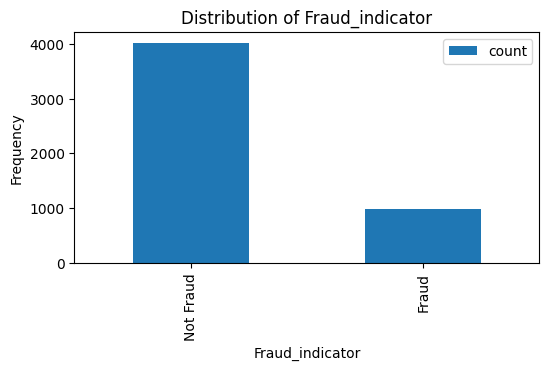

In [12]:
# Visualize the distribution of the target variable 'Fraud_indicator'
count = df["Fraud_indicator"].value_counts()
plt.figure(figsize=(6,3))
count.plot(kind="bar")
plt.title('Distribution of Fraud_indicator')
plt.xlabel('Fraud_indicator')
plt.ylabel('Frequency')
plt.legend()
plt.show()

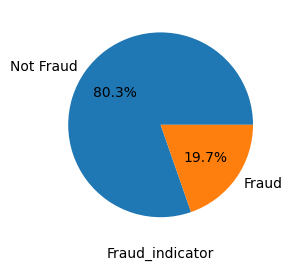

In [13]:
plt.figure(figsize=(6,3))
plt.pie(count, labels=count.index, autopct="%1.1f%%")
plt.xlabel("Fraud_indicator")
plt.show()

In [14]:
numerical_futures = df.select_dtypes(include=["float64", "int64"]).columns
numerical_futures_corr = df[numerical_futures].corr()
numerical_futures_corr

,Transaction_Amount,Amount_paid,Vehicle_Speed
Transaction_Amount,1.000000,0.870078,0.053229
Amount_paid,0.870078,1.000000,0.039027
Vehicle_Speed,0.053229,0.039027,1.000000


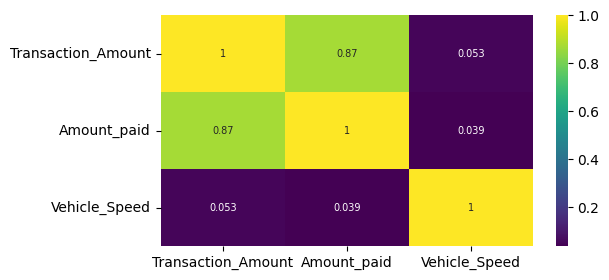

In [15]:
# correlation heatmap
plt.figure(figsize=(6,3))
sns.heatmap(numerical_futures_corr, annot=True, annot_kws={"fontsize": 7}, cmap="viridis")
plt.show()

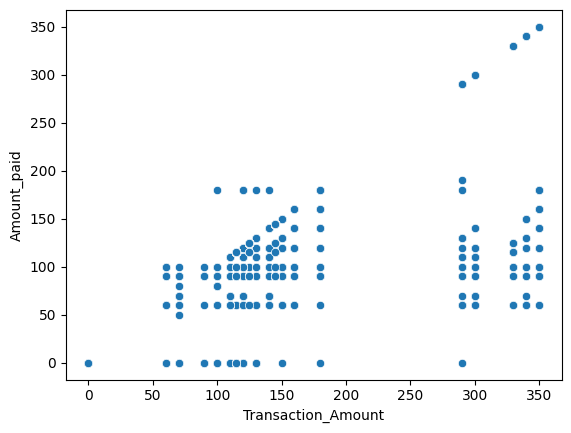

In [16]:
# Visualize the relationship between numerical features
sns.scatterplot(df, x="Transaction_Amount", y="Amount_paid", marker="o")
plt.show()

In [17]:
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
numerical_cols

Index(['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed'], dtype='object')

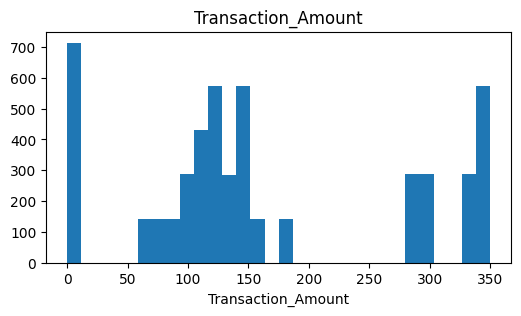

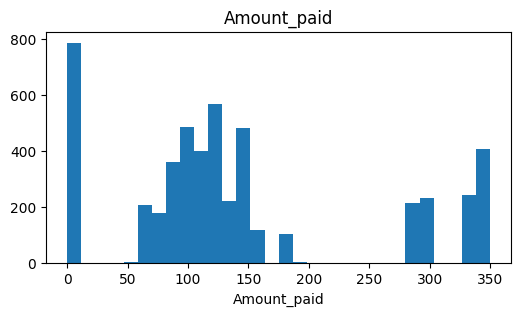

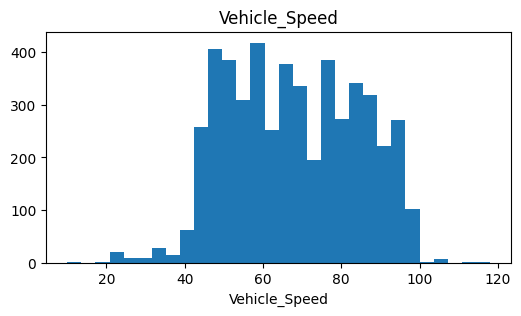

In [18]:
for i in numerical_cols:
  plt.figure(figsize=(6,3))
  plt.hist(df[i], bins=30)
  plt.title(i)
  plt.xlabel(i)
  plt.show()

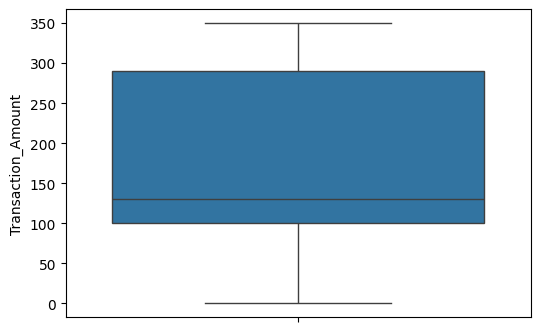

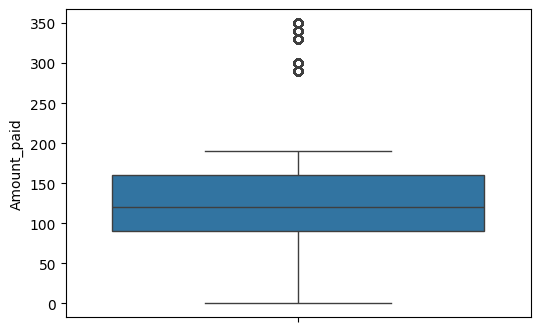

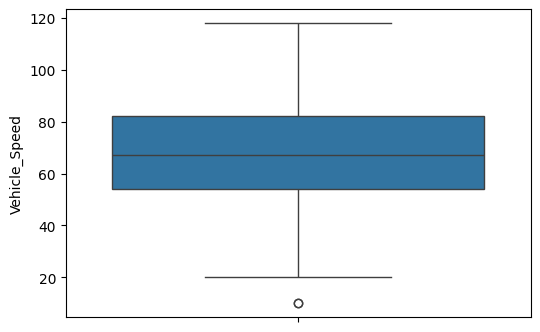

In [19]:
for i in numerical_cols:
  plt.figure(figsize=(6,4))
  sns.boxplot(df[i] )
  plt.show()

In [20]:
categorical_features = df.select_dtypes(include=["object"]).columns
categorical_features

Index(['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions',
       'Geographical_Location', 'Fraud_indicator'],
      dtype='object')

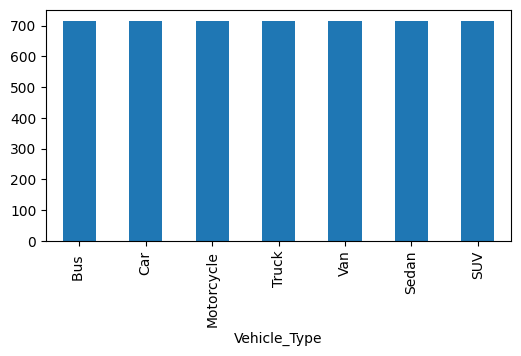

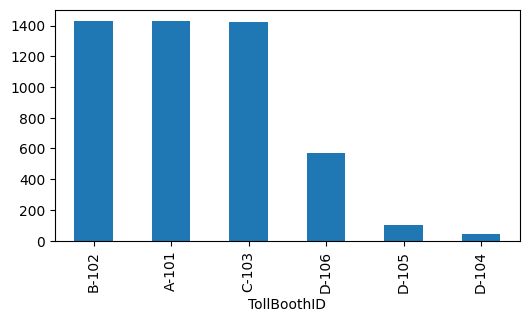

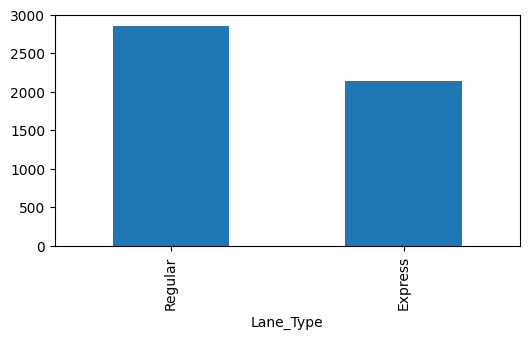

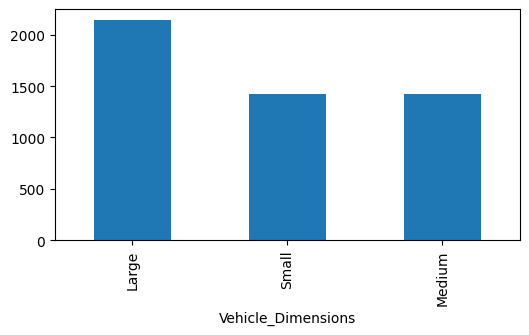

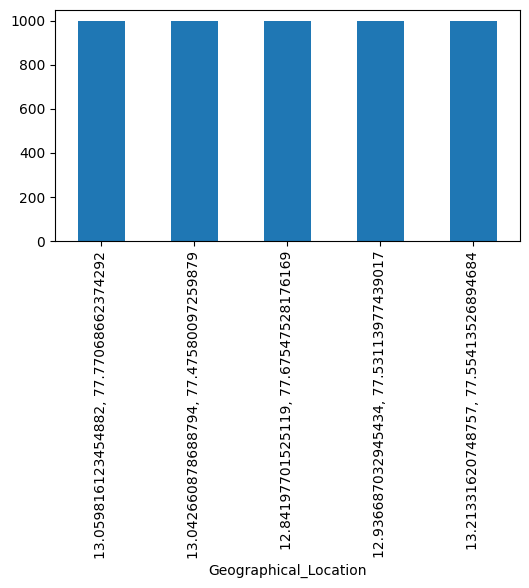

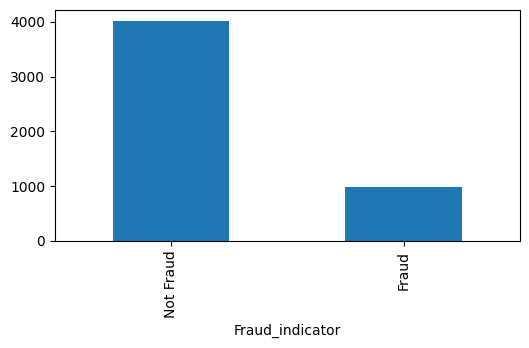

In [21]:
for i in categorical_features:
  count= df[i].value_counts()
  plt.figure(figsize=(6,3))
  count.plot(kind="bar")
  plt.show()

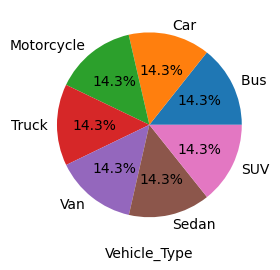

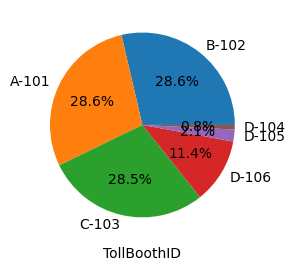

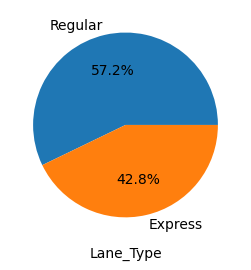

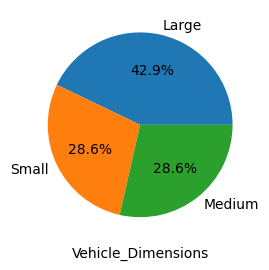

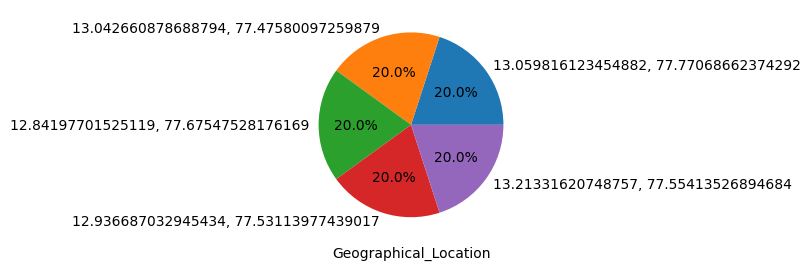

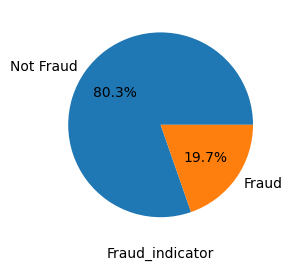

In [22]:
for i in categorical_features:
  count = df[i].value_counts()
  plt.figure(figsize=(6,3))
  plt.pie(count, labels=count.index, autopct="%1.1f%%")
  plt.xlabel(i)
  plt.show()

In [23]:
df.head()

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,Day,Month,Year,Hour,Minute
0,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud,6,1,2023,11,20
1,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud,7,1,2023,14,55
2,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud,8,1,2023,18,25
3,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud,9,1,2023,2,5
4,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud,10,1,2023,6,35


In [24]:
df = df.sample(frac=0.8, random_state=2024)
df_test = df.drop(df.index)

df, df_test

(     Vehicle_Type TollBoothID Lane_Type Vehicle_Dimensions  \
 355         Sedan       A-101   Regular             Medium   
 2891          SUV       B-102   Regular              Large   
 3411          Car       A-101   Regular              Small   
 3594   Motorcycle       D-106   Regular              Small   
 4710        Sedan       A-101   Express             Medium   
 ...           ...         ...       ...                ...   
 4680        Truck       C-103   Express              Large   
 4713          Car       A-101   Regular              Small   
 4268          Van       B-102   Express             Medium   
 3331        Sedan       A-101   Regular             Medium   
 2732          Car       A-101   Express              Small   
 
       Transaction_Amount  Amount_paid                  Geographical_Location  \
 355                  160          160  13.059816123454882, 77.77068662374292   
 2891                 180          180  13.059816123454882, 77.77068662374292   

In [25]:
df.to_csv("Fragtag_train.csv", index=False)
df_test.to_csv("fragtag_test.csv", index=False)

In [26]:
df = pd.read_csv("Fragtag_train.csv")
df.head()

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,Day,Month,Year,Hour,Minute
0,Sedan,A-101,Regular,Medium,160,160,"13.059816123454882, 77.77068662374292",82,Not Fraud,4,6,2023,15,40
1,SUV,B-102,Regular,Large,180,180,"13.059816123454882, 77.77068662374292",85,Not Fraud,20,1,2023,23,38
2,Car,A-101,Regular,Small,60,60,"13.042660878688794, 77.47580097259879",87,Not Fraud,18,10,2023,16,28
3,Motorcycle,D-106,Regular,Small,0,0,"12.84197701525119, 77.67547528176169",67,Not Fraud,28,2,2023,22,15
4,Sedan,A-101,Express,Medium,115,115,"13.21331620748757, 77.55413526894684",60,Not Fraud,8,9,2023,17,20


In [27]:
from sklearn.preprocessing import OneHotEncoder

def apply_one_hot_encoding(dataframe):
  categorical_one_hot = ['TollBoothID', 'Vehicle_Dimensions']
  encoder = OneHotEncoder(sparse_output=False)

  # Fit and transform the categorical data
  encoded_data = encoder.fit_transform(dataframe[categorical_one_hot])

  # Create a DataFrame with the encoded data
  encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_one_hot))

  # Concatenate the original dataframe (without the original categorical columns) with the new encoded dataframe
  result = pd.concat([dataframe.drop(categorical_one_hot, axis=1).reset_index(drop=True), encoded_df], axis=1)
  return result

df = apply_one_hot_encoding(df)

In [29]:
from sklearn.preprocessing import LabelEncoder

def apply_label_encoder(dataframe):
  le = LabelEncoder()
  for col in ['Vehicle_Type','Lane_Type','Geographical_Location','Fraud_indicator']:
    if col in dataframe.columns:
      dataframe[col] = le.fit_transform(dataframe[col])

  return dataframe

df = apply_label_encoder(df)
df

,Vehicle_Type,Lane_Type,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,Day,Month,Year,...,Minute,TollBoothID_A-101,TollBoothID_B-102,TollBoothID_C-103,TollBoothID_D-104,TollBoothID_D-105,TollBoothID_D-106,Vehicle_Dimensions_Large,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small
0,4,1,160,160,3,82,1,4,6,2023,...,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3,1,180,180,3,85,1,20,1,2023,...,38,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,60,60,2,87,1,18,10,2023,...,28,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,1,0,0,0,67,1,28,2,2023,...,15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,4,0,115,115,4,60,1,8,9,2023,...,20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,5,0,330,100,4,67,0,17,4,2023,...,45,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3996,1,1,90,90,4,97,1,31,10,2023,...,36,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3997,6,0,120,120,1,42,1,7,2,2023,...,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3998,4,1,100,100,2,55,1,4,5,2023,...,35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
X = df.drop(["Fraud_indicator"], axis=1)
y = df["Fraud_indicator"]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [33]:
df['Transaction_Amount'] = np.log1p(df['Transaction_Amount'])
df['Amount_paid'] = np.log1p(df['Amount_paid'])

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

df[['Transaction_Amount', 'Amount_paid']] = scaler_minmax.fit_transform(df[['Transaction_Amount', 'Amount_paid']])

df['Vehicle_Speed'] = scaler_standard.fit_transform(df[['Vehicle_Speed']])

In [36]:
scaler = MinMaxScaler()
df[['Day', 'Year', 'Minute', "Month", "Hour"]] = scaler.fit_transform(df[['Day', 'Year', 'Minute', "Month", "Hour"]])

In [37]:
df

,Vehicle_Type,Lane_Type,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,Day,Month,Year,...,Minute,TollBoothID_A-101,TollBoothID_B-102,TollBoothID_C-103,TollBoothID_D-104,TollBoothID_D-105,TollBoothID_D-106,Vehicle_Dimensions_Large,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small
0,4,1,0.867018,0.867018,3,0.851892,1,0.100000,0.454545,0.0,...,0.677966,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3,1,0.886997,0.886997,3,1.032286,1,0.633333,0.000000,0.0,...,0.644068,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,0.701420,0.701420,2,1.152548,1,0.566667,0.818182,0.0,...,0.474576,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,1,0.000000,0.000000,0,-0.050074,1,0.900000,0.090909,0.0,...,0.254237,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,4,0,0.811084,0.811084,4,-0.470992,1,0.233333,0.727273,0.0,...,0.338983,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,5,0,0.989990,0.787458,4,-0.050074,0,0.533333,0.272727,0.0,...,0.762712,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3996,1,1,0.769668,0.769668,4,1.753859,1,1.000000,0.818182,0.0,...,0.610169,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3997,6,0,0.818285,0.818285,1,-1.553352,1,0.200000,0.090909,0.0,...,0.016949,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3998,4,1,0.787458,0.787458,2,-0.771647,1,0.100000,0.363636,0.0,...,0.593220,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train,y_train)

In [52]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train_SMOTE, y_train_SMOTE)

y_pred = lr_model.predict(X_test)
print("LogisticRegression\n")
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

LogisticRegression

Test Accuracy: 0.9875
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       145
           1       0.98      1.00      0.99       655

    accuracy                           0.99       800
   macro avg       0.99      0.97      0.98       800
weighted avg       0.99      0.99      0.99       800



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
from sklearn.neighbors import KNeighborsClassifier

kn_model = KNeighborsClassifier(n_neighbors=7)

kn_model.fit(X_train_SMOTE, y_train_SMOTE)

y_pred = kn_model.predict(X_test)
print("KNeighborsClassifier\n")
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

KNeighborsClassifier

Test Accuracy: 0.97875
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       145
           1       0.98      0.99      0.99       655

    accuracy                           0.98       800
   macro avg       0.97      0.95      0.96       800
weighted avg       0.98      0.98      0.98       800



In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=50)

rf_model.fit(X_train_SMOTE, y_train_SMOTE)

y_pred = rf_model.predict(X_test)
print("RandomForestClassifier\n")
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report\n:", classification_report(y_test, y_pred))

RandomForestClassifier

Test Accuracy: 0.98375
Classification Report
:               precision    recall  f1-score   support

           0       1.00      0.91      0.95       145
           1       0.98      1.00      0.99       655

    accuracy                           0.98       800
   macro avg       0.99      0.96      0.97       800
weighted avg       0.98      0.98      0.98       800



In [55]:
from sklearn.svm import SVC

svc_model = SVC(kernel="linear")

svc_model.fit(X_train_SMOTE, y_train_SMOTE)

y_pred = svc_model.predict(X_test)
print("SVC\n")
print("Test Accuracy:", accuracy_score(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

SVC

Test Accuracy: 0.75375
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.92      0.57       145
           1       0.98      0.72      0.83       655

    accuracy                           0.75       800
   macro avg       0.70      0.82      0.70       800
weighted avg       0.87      0.75      0.78       800



In [49]:
import joblib

final_model = LogisticRegression()
final_model.fit(X, y)

joblib.dump(final_model, 'logistic_regression_model.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['logistic_regression_model.pkl']

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', final_model)
])

joblib.dump(pipeline, 'fraud_detection_pipeline.pkl')

['fraud_detection_pipeline.pkl']